<a href="https://colab.research.google.com/github/JSB-007/Contact-Management-System/blob/main/ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
# importing libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [ ]:
#importing datasets
df = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
#EDA
df.shape

(400, 5)

In [ ]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
#correlation
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


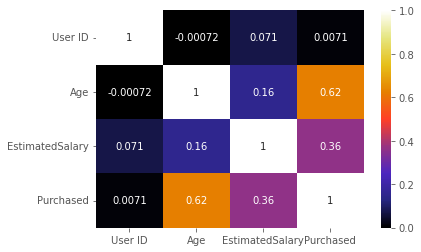

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'CMRmap' )
plt.show()

In [ ]:
#Extracting Independent and dependent Variable
x = df.iloc[:, 2:4].values
y = df.iloc[:, 4].values

In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state = 100)

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler

# initializing the StandardScaler
sc = StandardScaler()

# fit & transform of train and test data

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [ ]:
# importing KNN
from sklearn.neighbors import KNeighborsClassifier

# initializing of KNN

knn_classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski', p=2)

# model fitting & training
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Prediction

y_pred = knn_classifier.predict(X_test)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score
#Confusion Metrics
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[63  2]
 [ 6 29]]


In [ ]:
#Accuracy
ac = accuracy_score(y_pred,y_test)
print(ac)

0.92


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.94      0.83      0.88        35

    accuracy                           0.92       100
   macro avg       0.92      0.90      0.91       100
weighted avg       0.92      0.92      0.92       100



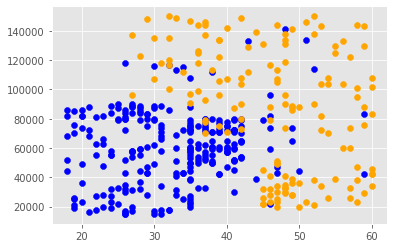

In [ ]:
#scatter plot of actual dataset
plt.scatter(x = x[y == 0,0], y = x[y == 0,1], color = 'blue')
plt.scatter(x = x[y == 1,0], y = x[y == 1,1], color = 'orange')
plt.show()

C:\Users\student\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


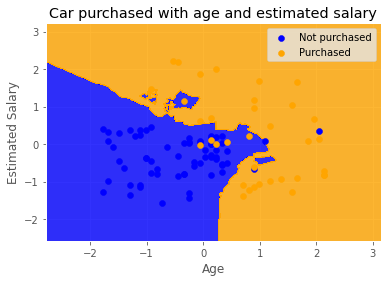

In [ ]:
#visualization of testing set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test


X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2,  knn_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.8, cmap = ListedColormap(('blue', 'orange')))


plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],color="blue",label="Not purchased")
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],color="orange",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Car purchased with age and estimated salary")
plt.legend()
plt.show()

In [ ]:
def predn(a, b):
    Age = a
    Salary = b
    new = np.array([Age, Salary])
    new = new.reshape(1, -1)
    new = sc.transform(new)

    result =   knn_classifier.predict(new)
    result = int(result)

    if result == 0:
        print('Do not Have A Car')
    else:
        print(' There is a Car')

In [ ]:
predn(42, 1000)

 There is a Car


C:\Users\student\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
